# IMAGE MANIPULATION PLAYGROUND

In this Notebook I will show different ways for image manipulation from matrix perspective

## Libraries and dependencies

For this workflow we are about to use:

- PIL for Image load and manipulation
- Request for bringing data from the web
- io for data transformation from bits to arrays
- matplotlib for data representation
- numpy for data manipulation

In [145]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

## Image load and manipulation

For this case, we are loading an image from an internet URL instead of full loading it as a dataset

Once the bits representation of the image is loaded is transformed into an image object

In [146]:
url = "https://cdn.pixabay.com/photo/2021/05/23/21/42/amogus-6277360_960_720.png"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

Next, we have to transform the data into a numpy array in order to manipulate the inner matrix of the image

If we check the image shape, we found a 720x676 pixels image with 4 channel corresponding to RGB scale and transparency level.

In [147]:
im_array = np.asarray(img)
print(im_array.shape)

(720, 676, 4)


Now that we have a numpy array it is fully playable by matplotlib.

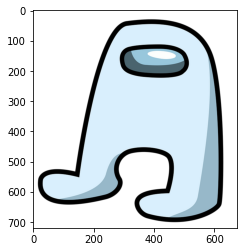

In [148]:
plt.imshow(im_array)

## Spliting data into individual arrays

Now we have a 720x676 image with 4 channels all represented into a matrix, what means we are now able to transform the data as it were just a regular math problem

First at all, let's separate every channel of the image into an individual array

In [149]:
r = im_array[:,:,0]
g = im_array[:,:,1]
b = im_array[:,:,2]
blank =  im_array[:,:,3]

If we check the content of any of the channel, we are gonna find different values from 0 to 255, which is the color range of a pixel

The method unique with return counts shows all the values in the array with their frequency

In [150]:
np.unique(blank, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

If we draw a single channel we get the inner representation of it, in this case, the "blank" channel represents the data segments where the image has more or less transparency

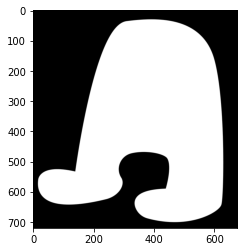

In [151]:
plt.imshow(blank, cmap = 'gray')

Finally, let's draw every channel to understand the intensity and role of all in the resulting image

<Figure size 432x288 with 0 Axes>

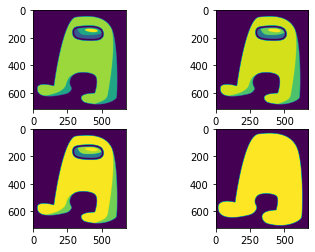

In [152]:
plt.figure()

f, axarr = plt.subplots(2,2) 

axarr[0][0].imshow(r)
axarr[0][1].imshow(g)
axarr[1][0].imshow(b)
axarr[1][1].imshow(blank)

## Creating new images based on the source data

For a fully isolated color channel representation, we are about to create an empty array to fill artificially the others channels.

In [153]:
dims = im_array.shape
aux_dim = np.zeros([dims[0], dims[1]])

Lets stack in a array some tons of 0.

In [154]:
red = np.dstack((r, aux_dim, aux_dim, blank)).astype(np.uint8)
green = np.dstack((aux_dim, g, aux_dim, blank)).astype(np.uint8)
blue = np.dstack((aux_dim, aux_dim, b, blank)).astype(np.uint8)
blank_2 = np.dstack((aux_dim, aux_dim, aux_dim, blank)).astype(np.uint8)

So we can make some combinations in order to stack the dimension

In [155]:
rg = np.dstack((r, g, aux_dim, blank)).astype(np.uint8)
gb =np.dstack((aux_dim, g, b, blank)).astype(np.uint8)
rb = np.dstack((r, aux_dim, b, blank)).astype(np.uint8)

Lastly, lets create a negative version of the image

In [156]:
reversed_im_array = np.dstack((r, g, b)).astype(np.uint8)
reversed_im_array = 255 - reversed_im_array
reversed_im_array = np.dstack((reversed_im_array, blank)).astype(np.uint8)

## Plotting new images

Even if you don't think so, we just created tons of new images from a matrix perspective

let's plot all of them to see the results

<Figure size 432x288 with 0 Axes>

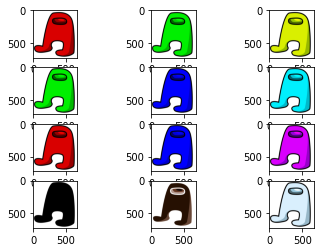

In [157]:
plt.figure()

f, axarr = plt.subplots(4,3) 

axarr[0][0].imshow(red)
axarr[0][1].imshow(green)
axarr[0][2].imshow(rg)

axarr[1][0].imshow(green)
axarr[1][1].imshow(blue)
axarr[1][2].imshow(gb)


axarr[2][0].imshow(red)
axarr[2][1].imshow(blue)
axarr[2][2].imshow(rb)


axarr[3][0].imshow(blank_2)
axarr[3][1].imshow(reversed_im_array)
axarr[3][2].imshow(im_array)

Even if you want, you can revert the transparency scale with a simple operation

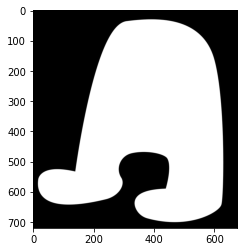

In [158]:
blank_3 = blank_2
blank_3[:,:,3] = 255 - blank_3[:,:,3]
plt.imshow(blank_3)

And if you wish to turn the image into gray scale, PIL can make the mathematical operation for you

(720, 676)


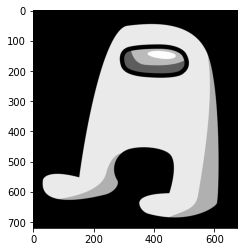

In [159]:
img_gray = img.convert('L')
#Y' = 0.299 R + 0.587 G + 0.114 B 

im_array_gray = np.asarray(img_gray)

plt.imshow(im_array_gray, cmap = 'gray')

print(im_array_gray.shape)

## Images as arrays

Lastly, let's understand how the machine sees your interpretation of an image

Lets make the image very small for our convenience

(20, 17)


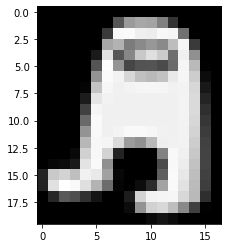

In [160]:
resized =  img_gray.resize((17,20))
im_resized = np.asarray(resized)
plt.imshow(im_resized, cmap = 'gray')
print(im_resized.shape)

In [161]:
for i in im_resized:
    print(i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0  84 151 163 159 125  50   0   0   0   0]
[  0   0   0   0   0   0  57 243 244 233 231 242 239 111   0   0   0]
[  0   0   0   0   0   0 163 174 121 135 147 135 184 240  57   0   0]
[  0   0   0   0   0  26 220  84 132 195 217 198 107 234 141   0   0]
[  0   0   0   0   0  82 247 145  69  81  82  73 105 239 181   1   0]
[  0   0   0   0   0 143 244 237 210 187 180 189 227 240 200  12   0]
[  0   0   0   0   4 191 240 234 237 239 240 239 235 237 210  24   0]
[  0   0   0   0  28 223 236 234 234 234 234 234 234 237 213  36   0]
[  0   0   0   0  64 239 234 234 234 234 234 234 234 237 213  46   0]
[  0   0   0   0 104 244 234 234 234 234 234 234 234 237 210  53   0]
[  0   0   0   0 144 243 234 237 243 243 240 235 234 236 206  59   0]
[  0   0   0   0 178 241 239 213 152 142 180 233 235 236 200  64   0]
[  0   0   0   9 204 242 207  35   0   0   0 127 242 234 195  66   0]
[  0   7  11  26 222 243 141   0   0   0   0  73 242 2

In [162]:
def print_pixels(im_resized, horizontal_flip = False, vertical_flip = False):
    printable = ""
    if vertical_flip == True:
        im_resized = list(reversed(im_resized))
    for i in im_resized:
        if horizontal_flip ==True:
            i = list(reversed(i))
        for j in i:
            if j == 0:
                printable += "    "
            elif j < 10:
                printable = printable + "   " + str(j)
            elif j < 100:
                printable = printable + "  " + str(j)
            else:
                printable = printable + " " + str(j)
        printable += "\n"
    print(printable)

In [163]:
print_pixels(im_resized)

                                                                    
                              84 151 163 159 125  50                
                          57 243 244 233 231 242 239 111            
                         163 174 121 135 147 135 184 240  57        
                      26 220  84 132 195 217 198 107 234 141        
                      82 247 145  69  81  82  73 105 239 181   1    
                     143 244 237 210 187 180 189 227 240 200  12    
                   4 191 240 234 237 239 240 239 235 237 210  24    
                  28 223 236 234 234 234 234 234 234 237 213  36    
                  64 239 234 234 234 234 234 234 234 237 213  46    
                 104 244 234 234 234 234 234 234 234 237 210  53    
                 144 243 234 237 243 243 240 235 234 236 206  59    
                 178 241 239 213 152 142 180 233 235 236 200  64    
               9 204 242 207  35             127 242 234 195  66    
       7  11  26 222 243 141      

In [164]:
print_pixels(im_resized, horizontal_flip = True)

                                                                    
                  50 125 159 163 151  84                            
             111 239 242 231 233 244 243  57                        
          57 240 184 135 147 135 121 174 163                        
         141 234 107 198 217 195 132  84 220  26                    
       1 181 239 105  73  82  81  69 145 247  82                    
      12 200 240 227 189 180 187 210 237 244 143                    
      24 210 237 235 239 240 239 237 234 240 191   4                
      36 213 237 234 234 234 234 234 234 236 223  28                
      46 213 237 234 234 234 234 234 234 234 239  64                
      53 210 237 234 234 234 234 234 234 234 244 104                
      59 206 236 234 235 240 243 243 237 234 243 144                
      64 200 236 235 233 180 142 152 213 239 241 178                
      66 195 234 242 127              35 207 242 204   9            
      67 189 231 242  73          

In [165]:
print_pixels(im_resized, horizontal_flip = True, vertical_flip = True)

                  11  20  10                                        
       2  62 134 185 211 204 143  12                                
      45 180 211 240 239 237 206  29          20  48  76  87  38    
      61 182 220 243 158  42  12       5 106 176 217 243 249 219  34
      65 185 226 244  93               8 157 227 235 186 206 196  36
      67 189 231 242  73                 141 243 222  26  11   7    
      66 195 234 242 127              35 207 242 204   9            
      64 200 236 235 233 180 142 152 213 239 241 178                
      59 206 236 234 235 240 243 243 237 234 243 144                
      53 210 237 234 234 234 234 234 234 234 244 104                
      46 213 237 234 234 234 234 234 234 234 239  64                
      36 213 237 234 234 234 234 234 234 236 223  28                
      24 210 237 235 239 240 239 237 234 240 191   4                
      12 200 240 227 189 180 187 210 237 244 143                    
       1 181 239 105  73  82  81  

# WORKING WITH DATA AUGMENTATION

We can increase exponentially the amount of new images created with data augmentation, fro this case, we are about to use the Image Data Generator module Incorporated in Keras

In [166]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np


Let's repeat the process of load and transformation

(720, 676, 4)


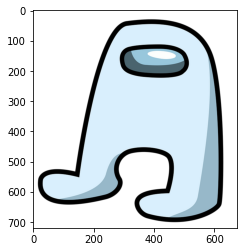

In [167]:
url = "https://cdn.pixabay.com/photo/2021/05/23/21/42/amogus-6277360_960_720.png"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

im_array = np.asarray(img)
print(im_array.shape)

plt.imshow(im_array)

The Image Data Generator allows us to generate new images based on specific rules

You can set the posibilities as you wish, for example, the image can be shift, rotated, zoomed, flipped and so on

Once the rules as setted, the generator will create new samples based on a random combination of this features

In [168]:
datagen = ImageDataGenerator(rotation_range = 30,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range=0.2,
                   zoom_range = 0.15,
                   horizontal_flip = True,
                   fill_mode = 'nearest',
                   brightness_range = [0.4, 1.5]
)

In order to make the generator work, we need to add a new dimension to our image (or dataset), the representation of this new shape is "a block of 1 image with 720x676 pixels of 4 channels"

In [169]:
im_array = im_array.reshape((1,) + im_array.shape)
im_array.shape

(1, 720, 676, 4)

Lastly, lets make the setup for the generator

First at all, we have to define how much images we want (in this case the are going to be shown on a plt subplot, so the limit is the height * width

Once the plot is created, we are about to loop into the flow method of datagen, this loop is basically infinite and you need to set a rule for the stop

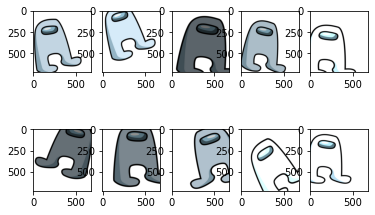

In [170]:
i = 0

height = 2
width = 5

start_height = 0
start_width = 0

f, axarr = plt.subplots(height, width) 

for batch in datagen.flow(im_array, batch_size = 1):
    axarr[start_height][start_width].imshow(array_to_img(batch[0]))
    
    start_width+=1
    
    if start_width >= width:
        start_width -= width
        start_height +=1
    
    i+=1
    
    if i % (height * width) == 0:
        final_generation = array_to_img(batch[0])
        break

plt.show()

In [171]:
final_generation = final_generation.convert('L')

resized =  final_generation.resize((17,20))
final_generation_resized = np.asarray(resized)

In [172]:
print_pixels(final_generation_resized)

                                                                    
              12  19   7                                            
      29 163 230 239 221 172  82                                    
  15 204 243 183 184 205 243 254  45                                
 110 255 137 197 224 196 137 190 126                                
 203 255 146  99 133 153 104 157 180                                
 245 255 254 213 176 156 166 243 205   1                            
 250 255 255 255 255 255 255 255 222  11                            
 254 255 255 255 255 255 255 255 234  21                            
 255 255 255 255 255 255 255 255 242  29                            
 255 255 255 255 255 255 255 255 246  35                            
 255 255 253 228 237 255 255 255 248  38                            
 255 252  92  15  24  86 231 255 248  39                            
 255 231  12             119 255 248  38                            
 255 226   4           1 131 255 2

# USING A REAL DATASET

For this case, i will be using the configuration made for a real neural network training

you can find the dataset [here](https://www.kaggle.com/datasets/sebastianfrancogomez/tarros-dataset-final-for-real)

In [173]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.3,
        horizontal_flip = False
    )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [174]:
train_generator = train_datagen.flow_from_directory('../input/tarros-dataset-final-for-real/DATASET_improved/1_front/train',
                                 target_size = (256,180),
                                 batch_size = 4,
                                 class_mode = "binary")

Found 448 images belonging to 2 classes.


In [175]:
train_generator[0][0].shape

(4, 256, 180, 3)

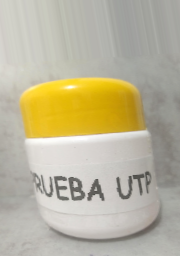

In [176]:
array_to_img(train_generator[0][0][0])

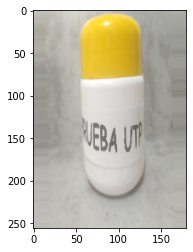

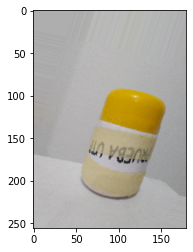

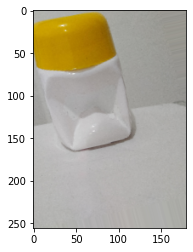

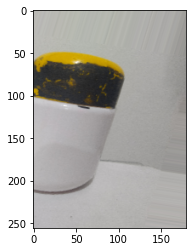

In [177]:
j = 0
for i in train_generator[0][0]:
    plt.figure(j)
    plt.imshow(i)
    j+=1